In [1]:
import pandas as pd
import numpy as np
import deductive_system
import treatmentKG

In [2]:

input_path = 'Input/'

negative_treatment = input_path + 'treatment_negative_effect.csv'
positive_treatment = input_path + 'treatment_positive_effect.csv'
d_no_onco = input_path + 'patient_nonOncologycalTreatments.csv'

negative_treatment = pd.read_csv(negative_treatment, delimiter=",")
positive_treatment = pd.read_csv(positive_treatment, delimiter=",")
drug_no_onco = pd.read_csv(d_no_onco, delimiter=",")
ddi = deductive_system.load_dataset_ddi('../store_data/drug/Unsymmetric_DDI_corpus.csv')

drugBank_id_name = pd.read_csv('../store_data/drug/drugBank_id_name.csv', delimiter=",")

In [3]:
drug_no_onco = treatmentKG.preprocessing_nonOncological_drugs(drug_no_onco)
display(drug_no_onco.shape, drug_no_onco.head())

(1290, 2)

,patient_id,drug_name
0,1098173,Omeprazole
1,1098173,Ranitidine
2,1100890,Omeprazole
3,1103334,Omeprazole
4,1103334,Enalapril


In [4]:
treatment = treatmentKG.preprocessing_oncological_drugs(positive_treatment)
display(treatment.shape, treatment.head())

(113, 7)

,patient_id,fecinitto,fecfintto,tipoterapia,ct_drug,ct_drug.1,ct_drug.2
0,3877,2009-03-27,2009-06-19,Quimioterapia intravenosa y oral,Carboplatin,Etoposide,NaN
1,12870,2016-07-12,2016-10-03,Quimioterapia adyuvante,Carboplatin,Vinorelbine,NaN
2,31556,2019-03-06,2019-03-06,Inmunoterapia,Nivolumab,Ipilimumab,NaN
3,73088,2012-07-23,2012-10-15,Quimioterapia adyuvante,Carboplatin,Paclitaxel,NaN
4,82680,2013-04-16,2013-07-15,Quimioterapia intravenosa y oral,Carboplatin,Etoposide,NaN


In [5]:
treatment = treatmentKG.create_treatment(drug_no_onco, treatment)
treatment

,patient_id,fecinitto,drug_name
0,3877,2009-03-27,"[Omeprazole, Atenolol, Carboplatin, Etoposide]"
1,12870,2016-07-12,"[Atorvastatin, Carboplatin, Vinorelbine]"
2,31556,2019-03-06,"[Nivolumab, Ipilimumab]"
3,73088,2012-07-23,"[Omeprazole, Ranitidine, Carboplatin, Paclitaxel]"
4,82680,2013-04-16,"[Simvastatin, Carboplatin, Etoposide]"
...,...,...,...
104,2769301,2017-11-22,"[Omeprazole, Enalapril, Nivolumab, Paclitaxel,..."
105,2771360,2018-02-13,"[Omeprazole, Simvastatin, Carboplatin, Vinorel..."
106,2774867,2018-04-10,"[Omeprazole, Atorvastatin, Carboplatin, Vinore..."
107,2826513,2019-07-19,"[Carboplatin, Vinorelbine]"


In [6]:
df_treatment, set_drugs = treatmentKG.preprocess_treatment(treatment, [])
display(df_treatment, set_drugs)

,drug_name,n_drugs
0,"[Allopurinol, Atenolol, Carboplatin, Etoposide...",9.0
1,"[Carboplatin, Enalapril, Furosemide, Omeprazol...",6.0
2,"[Carboplatin, Enalapril, Nivolumab, Omeprazole...",5.0
3,"[Atorvastatin, Carboplatin, Enalapril, Omepraz...",5.0
4,"[Carboplatin, Omeprazole, Simvastatin, Vinorel...",4.0
5,"[Acetaminophen, Lorazepam, Nivolumab, Simvasta...",4.0
6,"[Allopurinol, Carboplatin, Enalapril, Omeprazole]",4.0
7,"[Atorvastatin, Azithromycin, Carboplatin, Pacl...",4.0
8,"[Carboplatin, Lormetazepam, Omeprazole, Vinore...",4.0
9,"[Atorvastatin, Cisplatin, Enalapril, Vinorelbine]",4.0


{'Acetaminophen',
 'Afatinib',
 'Allopurinol',
 'Amlodipine',
 'Atenolol',
 'Atorvastatin',
 'Azithromycin',
 'Carboplatin',
 'Cisplatin',
 'Cyclophosphamide',
 'Docetaxel',
 'Doxorubicin',
 'Durvalumab',
 'Enalapril',
 'Erlotinib',
 'Etoposide',
 'Furosemide',
 'Gefitinib',
 'Gemcitabine',
 'Human_immunoglobulin_g',
 'Ibuprofen',
 'Ipilimumab',
 'Lorazepam',
 'Lormetazepam',
 'Nivolumab',
 'Omeprazole',
 'Osimertinib',
 'Paclitaxel',
 'Pembrolizumab',
 'Pemetrexed',
 'Ranitidine',
 'Simvastatin',
 'Spironolactone',
 'Vadimezan',
 'Vincristine',
 'Vinorelbine'}

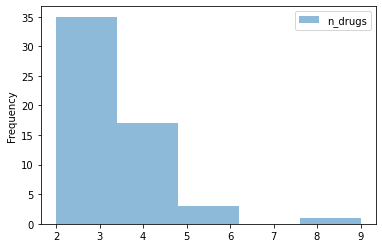

In [7]:
import matplotlib.pyplot as plt
df = df_treatment[['n_drugs']]
ax = df.plot.hist(bins=5, alpha=0.5)

plt.savefig("histogram_positive_treatment.png", format='png', bbox_inches='tight', dpi=300)

In [8]:
drugBank_id = treatmentKG.get_drugbank_id(set_drugs, drugBank_id_name)
treatmentKG.generate_kg_treatment(df_treatment, drugBank_id, ddi, 524, 'positive')

In [11]:
set_drugs = set(positive_treatment['ct_drug'].unique())
set_drugs.update(set(positive_treatment['ct_drug.1'].unique()))
set_drugs.update(set(positive_treatment['ct_drug.2'].unique()))
set_drugs

{'Afatinib',
 'Carboplatino',
 'Ciclofosfamida',
 'Cisplatino',
 'Docetaxel',
 'Doxorrubicina',
 'Durvalumab (MEDI4736)',
 'Durvalumab(MEDI4736) vs Placebo',
 'Erlotinib',
 'Etopósido VP16',
 'Gefitinib',
 'Gemcitabina',
 'Ipilimumab',
 'Nivolumab',
 'Osimertinib',
 'Otro',
 'Paclitaxel',
 'Pembrolizumab vs placebo',
 'Pemetrexed',
 'Vadimezan (ASA404)',
 'Vincristina',
 'Vinorelbina',
 nan}

In [12]:
drugBank_id_name = pd.read_csv('../store_data/drug/drugBank_id_name.csv', delimiter=",")
display(drugBank_id_name.shape, drugBank_id_name.head())

(14315, 2)

,DrugBankID,DrugName
0,DB00001,Lepirudin
1,DB00002,Cetuximab
2,DB00003,Dornase_alfa
3,DB00004,Denileukin_diftitox
4,DB00005,Etanercept


In [9]:
drug_treatment = pd.DataFrame(set_drugs, columns=['DrugName'])
drugBank_id = pd.merge(drugBank_id_name, drug_treatment,on='DrugName')
#drug_id.to_csv('treatments/MIMIC_drugBank_id.csv', index=False)
drugBank_id

,DrugBankID,DrugName
0,DB00028,Human_immunoglobulin_g
1,DB00186,Lorazepam
2,DB00207,Azithromycin
3,DB00316,Acetaminophen
4,DB00317,Gefitinib
5,DB00335,Atenolol
6,DB00338,Omeprazole
7,DB00361,Vinorelbine
8,DB00381,Amlodipine
9,DB00421,Spironolactone


In [10]:
fix_name = drug_treatment.merge(drugBank_id, how = 'outer' , on='DrugName', indicator=True).loc[lambda x : x['_merge']=='left_only']
fix_name

,DrugName,DrugBankID,_merge


In [16]:
fix_name.DrugName.values

array([nan, 'Carboplatino', 'Vinorelbina', 'Otro', 'Vadimezan (ASA404)',
       'Gemcitabina', 'Vincristina', 'Durvalumab(MEDI4736) vs Placebo',
       'Cisplatino', 'Doxorrubicina', 'Etopósido VP16', 'Ciclofosfamida',
       'Durvalumab (MEDI4736)', 'Pembrolizumab vs placebo'], dtype=object)